Libraries Load


Import dataset

Number of rows and columns in the data set:  (1338, 7)

Exists m=1338  training examples and  n=7  independent variables. - 
La variable dependiente es el costo, supuesta a ser relacional con los demas argumentos
Data Desc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
edad       1338 non-null int64
sexo       1338 non-null object
bmi        1338 non-null float64
ninos      1338 non-null int64
fumador    1338 non-null object
region     1338 non-null object
cargo      1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Explorando la data.
Matrx BMI vs Insurance Charges
correlation plot.
La grafica muestra que no hay correlacion entre las variables


C:\Anaconda\anaconda3\r-reticulate\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Notamos que los valores varian entre 1120 y 63500 el plot esta sesgado a la derecha.


C:\Anaconda\anaconda3\r-reticulate\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


En este plot aplicamos logaritmo natural que debe ser la tendencia para los analisis futuros de esta data.


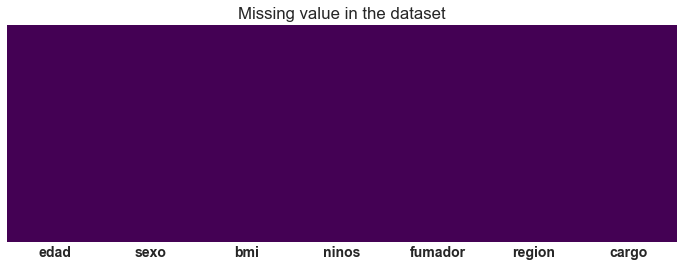

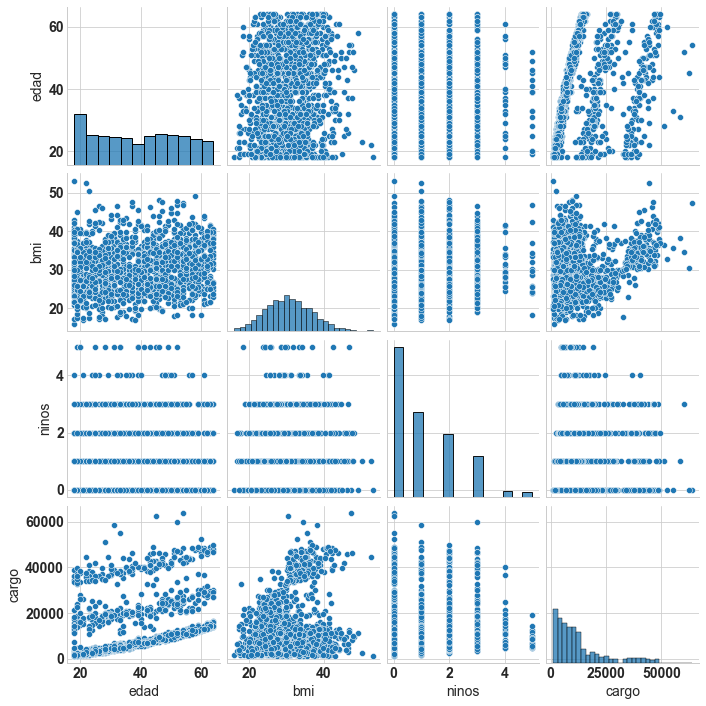

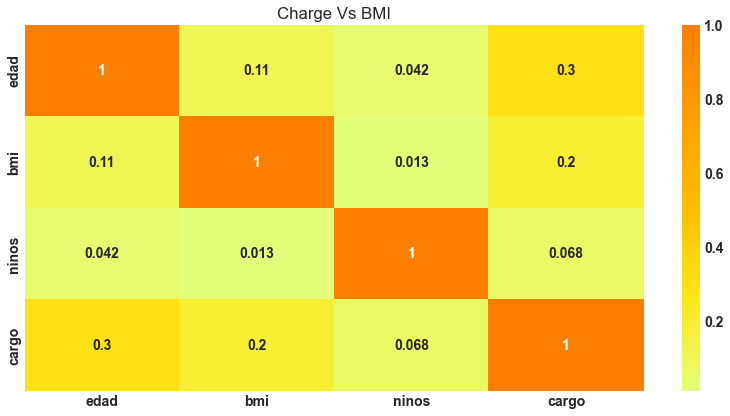

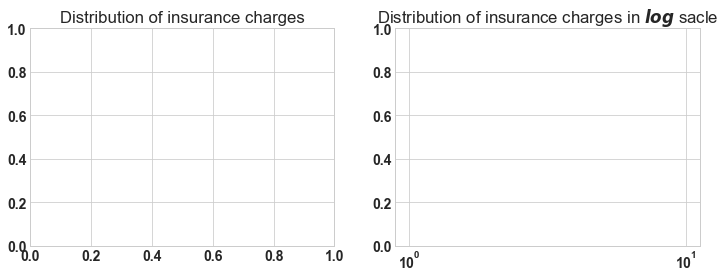

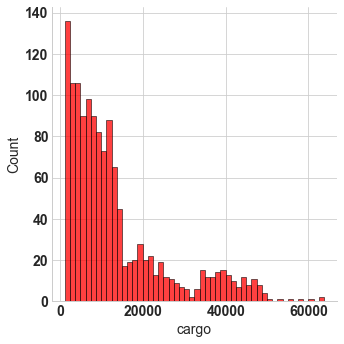

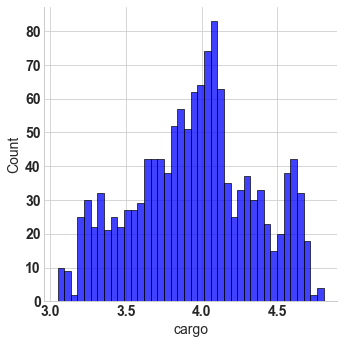

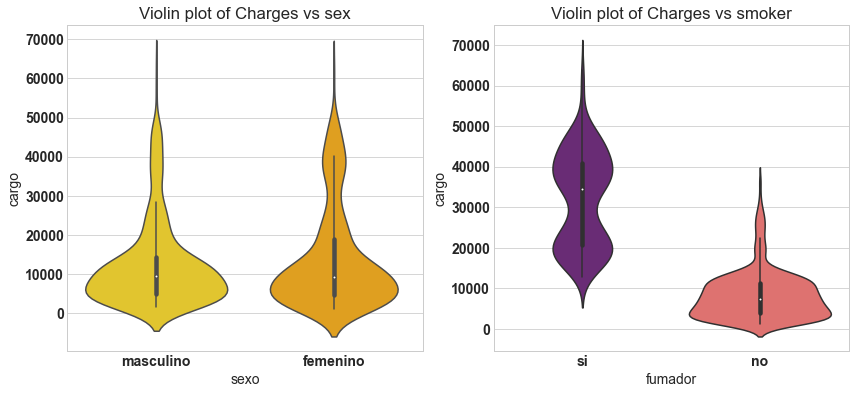

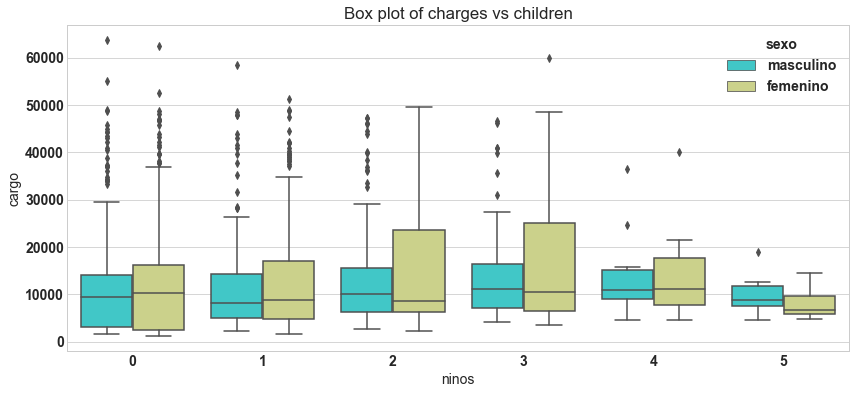

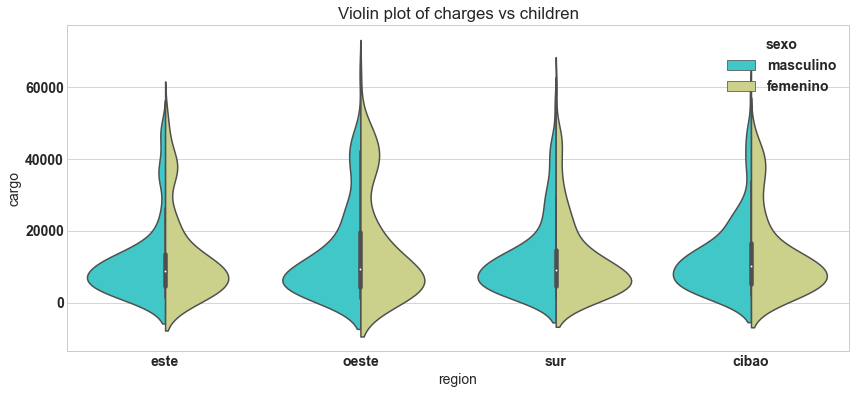

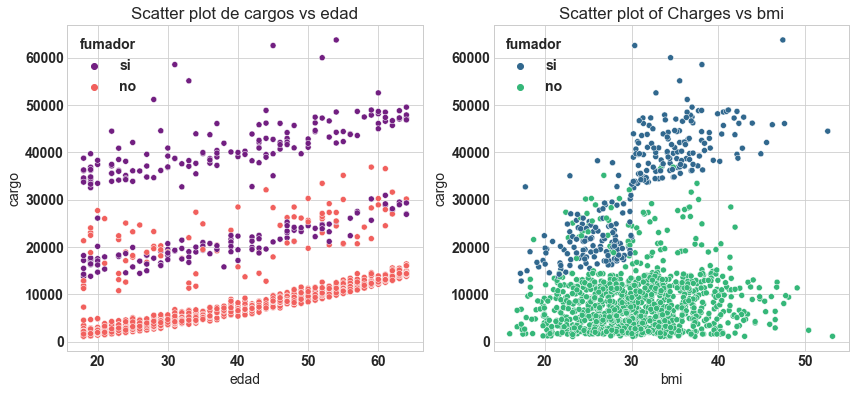

In [2]:
## Proyecto Matrix para iniciar el analisis de data
## Usaremos como muestra la data de Aseguradoras de Salud
## El problema consite en determinar el costo de los servicios de salud futuros y determiar los factores de riesgo
## que inciden en el costo facturado por servicios y su distribucion.

print("Libraries Load")
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import hvplot.pandas
%matplotlib inline
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

print("Import dataset")
#path ='dataset/'
df = pd.read_csv('C:\\Users\\LENOVO\\Downloads\\insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

print("Exists m=1338  training examples and  n=7  independent variables. - ")
print("La variable dependiente es el costo, supuesta a ser relacional con los demas argumentos")

print("Data Desc")
#Data peak view
df.head()

#Evaluating Data 
df.describe()

df.info()
df.columns

#null values ev
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

print("Explorando la data.")
sns.pairplot(df)


print("Matrx BMI vs Insurance Charges")
sns.lmplot(x='bmi',y='cargo',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

print("correlation plot.")
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

print("La grafica muestra que no hay correlacion entre las variables")

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.displot(df['cargo'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

print("Notamos que los valores varian entre 1120 y 63500 el plot esta sesgado a la derecha.")

ax=f.add_subplot(122)
sns.displot(np.log10(df['cargo']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

print("En este plot aplicamos logaritmo natural que debe ser la tendencia para los analisis futuros de esta data.")

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sexo', y='cargo',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='fumador', y='cargo',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

plt.figure(figsize=(14,6))
sns.boxplot(x='ninos', y='cargo',hue='sexo',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

df.groupby('ninos').agg(['mean','min','max'])['cargo']

plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='cargo',hue='sexo',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='edad',y='cargo',data=df,palette='magma',hue='fumador',ax=ax)
ax.set_title('Scatter plot de cargos vs edad')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='cargo',data=df,palette='viridis',hue='fumador')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');



In [ ]:
#import sys
#!conda install --yes --prefix {sys.prefix} bokeh


In [ ]:
#!pip install tensorflow 

In [ ]:
#conda config --append channels conda-forge

Creando Dummy variable
Lets verify the dummy variable process
Columns in original data frame:
 ['edad' 'sexo' 'bmi' 'ninos' 'fumador' 'region' 'cargo']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['edad' 'bmi' 'cargo' 'OHE_masculino' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4'
 'OHE_5' 'OHE_si' 'OHE_este' 'OHE_oeste' 'OHE_sur']

Number of rows and columns in the dataset: (1338, 13)
# no funciona bien en este modelo, asi que usaremos log transform
Creando el modelo de regresion lineal simple
Evaluando el modelo de regresion simple
Los valores obtenidos son los mismos en nuestro modelo usando la ecuacion de regresion normal y verificandola con el modulo sklearn
# R_square Regression Linear
The Mean Square Error(MSE) or J(theta) is:  0.18729622322981587
R square obtain for normal equation method is : 0.7795687545055354
R_square Sklearn
The Mean Square Error(MSE) or J(theta) is:  0.18729622322981895
R square obtain for scikit learn libra

C:\Anaconda\anaconda3\r-reticulate\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Anaconda\anaconda3\r-reticulate\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\anaconda3\r-reticulate\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

6.991404120436252
Test set evaluation:
_____________________________________
MAE: 2.2005759824668525
MSE: 6.0105070273690595
RMSE: 2.451633542634188
R2 Square -6.073840183475098
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.2056163703196585
MSE: 6.132075523111328
RMSE: 2.4763027930992867
R2 Square -6.302012624566442
__________________________________
#Resultados del modelo lineal simple
***************************************************************************************************
#En nuestro modelo el plot del valor actual vs la prediccion es curva de modo que la asuncion linear usada falla.
#La media residual es cero y el error residual en el plot esta sesgado a la derecha.
#Q-Q plot muestra como valor el log value mayor a 1.5 tendente a incrementar.
#el grafico muestra heterocedasticidad, el error incrementara despues de cierto punto.
#El valor del factor de varianza de inflacion es menor de 5, no tiene multicolinealidad.


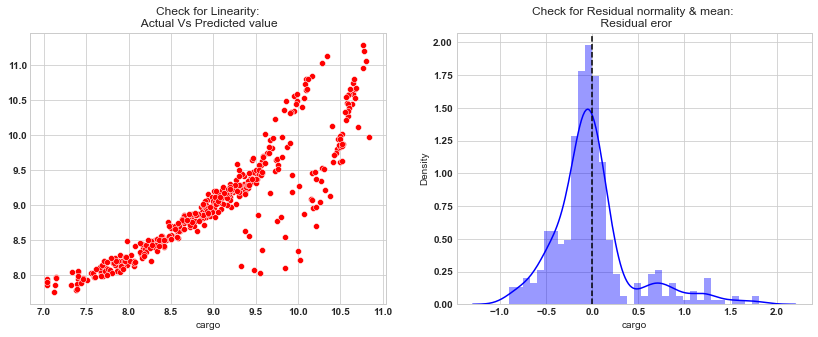

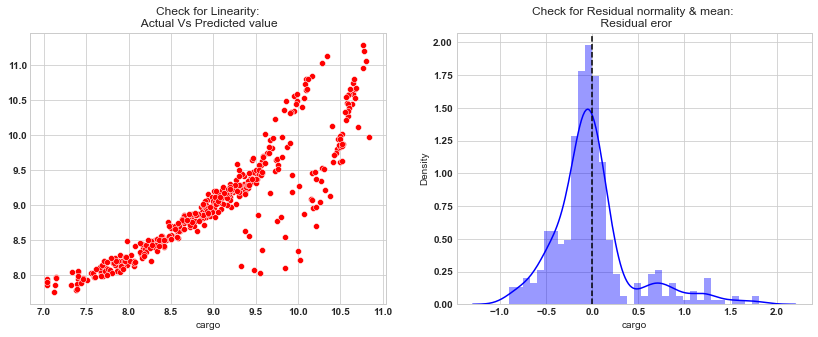

In [3]:

print("Creando Dummy variable")
categorical_columns = ['sexo','ninos', 'fumador', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

print("Lets verify the dummy variable process")
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['cargo'],alpha=0.05)

#df['charges'] = y_bc  
print("# no funciona bien en este modelo, asi que usaremos log transform")
ci,lam

## Log transform
df_encode['cargo'] = np.log(df_encode['cargo'])

from sklearn.model_selection import train_test_split
X = df_encode.drop('cargo',axis=1) # Independet variable
y = df_encode['cargo'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

print("Creando el modelo de regresion lineal simple")
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

      
print("Evaluando el modelo de regresion simple")      
print("Los valores obtenidos son los mismos en nuestro modelo usando la ecuacion de regresion normal y verificandola con el modulo sklearn")

      
#evaluando el modelo
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

print("# R_square Regression Linear")
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square) 

# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

print("R_square Sklearn")
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

#El modelo retorna un Rsquare de 77.95% por lo que encaja en la data bien. Pero puede mejorar.


print("Validacion del modelo de regresion linear")
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

#model evaluation
print(lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

#prediction from normal regression
pred = lin_reg.predict(X_test)
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()


test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

print("#Resultados del modelo lineal simple")
print("***************************************************************************************************")
print("#En nuestro modelo el plot del valor actual vs la prediccion es curva de modo que la asuncion linear usada falla.")
print("#La media residual es cero y el error residual en el plot esta sesgado a la derecha.")
print("#Q-Q plot muestra como valor el log value mayor a 1.5 tendente a incrementar.")
print("#el grafico muestra heterocedasticidad, el error incrementara despues de cierto punto.")
print("#El valor del factor de varianza de inflacion es menor de 5, no tiene multicolinealidad.")
  



In [4]:
print("Agregando resultado del modelo para integrar otros")
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

#Robust Regression
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


Agregando resultado del modelo para integrar otros
Test set evaluation:
_____________________________________
MAE: 2.2005759824668525
MSE: 6.0105070273690595
RMSE: 2.451633542634188
R2 Square -6.073840183475098
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.2056163703196585
MSE: 6.132075523111328
RMSE: 2.4763027930992867
R2 Square -6.302012624566442
__________________________________
Test set evaluation:
_____________________________________
MAE: 0.25762642106842076
MSE: 0.21036522115384151
RMSE: 0.45865588533653584
R2 Square 0.7524185650515673
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.2674621665182601
MSE: 0.24215572710183542
RMSE: 0.4920932097700957
R2 Square 0.7116434444187184
__________________________________


Model       MAE       MSE      RMSE  R2 Square  \
0  Linear Regression  2.200576  6.010507  2.451634  -6.073840   
1  Robust Regression  0.257626  0.210365  0.458656   0.752419   

   Cross Validation  
0          0.762564  
1          0.720075

In [5]:

#Ridge Regression
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df
 

Test set evaluation:
_____________________________________
MAE: 0.309605840076702
MSE: 0.2007728534823148
RMSE: 0.4480768388148564
R2 Square 0.7637079414021039
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.29699944388575056
MSE: 0.20436855525643116
RMSE: 0.45207140504176013
R2 Square 0.756640020997378
__________________________________


Model       MAE       MSE      RMSE  R2 Square  \
0  Linear Regression  2.200576  6.010507  2.451634  -6.073840   
1  Robust Regression  0.257626  0.210365  0.458656   0.752419   
2   Ridge Regression  0.309606  0.200773  0.448077   0.763708   

   Cross Validation  
0          0.762564  
1          0.720075  
2          0.762601

In [6]:
     
#Lasso Regression
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df
  

Test set evaluation:
_____________________________________
MAE: 0.3421881384272713
MSE: 0.24621476004853263
RMSE: 0.49620032249942425
R2 Square 0.7102267985936679
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.33209119253687025
MSE: 0.24479679406040653
RMSE: 0.49476943525283223
R2 Square 0.7084984889788959
__________________________________


Model       MAE       MSE      RMSE  R2 Square  \
0  Linear Regression  2.200576  6.010507  2.451634  -6.073840   
1  Robust Regression  0.257626  0.210365  0.458656   0.752419   
2   Ridge Regression  0.309606  0.200773  0.448077   0.763708   
3   Lasso Regression  0.342188  0.246215  0.496200   0.710227   

   Cross Validation  
0          0.762564  
1          0.720075  
2          0.762601  
3          0.263083

In [7]:
   
#Elastic Net
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df
 

Test set evaluation:
_____________________________________
MAE: 0.3388182950369143
MSE: 0.24328829808425767
RMSE: 0.49324263611761876
R2 Square 0.7136709879347727
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3290279847848223
MSE: 0.24264830617940852
RMSE: 0.4925934491844248
R2 Square 0.7110568863064642
__________________________________


Model       MAE       MSE      RMSE  R2 Square  \
0       Linear Regression  2.200576  6.010507  2.451634  -6.073840   
1       Robust Regression  0.257626  0.210365  0.458656   0.752419   
2        Ridge Regression  0.309606  0.200773  0.448077   0.763708   
3        Lasso Regression  0.342188  0.246215  0.496200   0.710227   
4  Elastic Net Regression  0.338818  0.243288  0.493243   0.713671   

   Cross Validation  
0          0.762564  
1          0.720075  
2          0.762601  
3          0.263083  
4          0.267098

In [8]:
     
#Polinomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df   
 

Test set evaluation:
_____________________________________
MAE: 42784539701.62653
MSE: 7.358677686597079e+23
RMSE: 857827353643.9065
R2 Square -8.660518934536093e+23
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.20079792217650938
MSE: 0.13143923980495928
RMSE: 0.3625455003236963
R2 Square 0.8434835016623777
__________________________________


Model           MAE           MSE          RMSE  \
0       Linear Regression  2.200576e+00  6.010507e+00  2.451634e+00   
1       Robust Regression  2.576264e-01  2.103652e-01  4.586559e-01   
2        Ridge Regression  3.096058e-01  2.007729e-01  4.480768e-01   
3        Lasso Regression  3.421881e-01  2.462148e-01  4.962003e-01   
4  Elastic Net Regression  3.388183e-01  2.432883e-01  4.932426e-01   
5   Polynomail Regression  4.278454e+10  7.358678e+23  8.578274e+11   

      R2 Square  Cross Validation  
0 -6.073840e+00          0.762564  
1  7.524186e-01          0.720075  
2  7.637079e-01          0.762601  
3  7.102268e-01          0.263083  
4  7.136710e-01          0.267098  
5 -8.660519e+23          0.000000

In [9]:
     
# Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df
 

Test set evaluation:
_____________________________________
MAE: 0.3436525244229725
MSE: 0.24524770626486245
RMSE: 0.4952249047300251
R2 Square 0.7113649361723045
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.34472640209697425
MSE: 0.2567997784642071
RMSE: 0.5067541597897417
R2 Square 0.6942054582882766
__________________________________


Model           MAE           MSE          RMSE  \
0            Linear Regression  2.200576e+00  6.010507e+00  2.451634e+00   
1            Robust Regression  2.576264e-01  2.103652e-01  4.586559e-01   
2             Ridge Regression  3.096058e-01  2.007729e-01  4.480768e-01   
3             Lasso Regression  3.421881e-01  2.462148e-01  4.962003e-01   
4       Elastic Net Regression  3.388183e-01  2.432883e-01  4.932426e-01   
5        Polynomail Regression  4.278454e+10  7.358678e+23  8.578274e+11   
6  Stochastic Gradient Descent  3.436525e-01  2.452477e-01  4.952249e-01   

      R2 Square  Cross Validation  
0 -6.073840e+00          0.762564  
1  7.524186e-01          0.720075  
2  7.637079e-01          0.762601  
3  7.102268e-01          0.263083  
4  7.136710e-01          0.267098  
5 -8.660519e+23          0.000000  
6  7.113649e-01          0.000000

In [10]:
     
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df
  

Test set evaluation:
_____________________________________
MAE: 0.22374523345408992
MSE: 0.15367840018305812
RMSE: 0.3920183671501351
R2 Square 0.8191339869337229
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.08283868998376569
MSE: 0.02676433217329005
RMSE: 0.16359808120295927
R2 Square 0.9681293078206751
__________________________________


Model           MAE           MSE          RMSE  \
0            Linear Regression  2.200576e+00  6.010507e+00  2.451634e+00   
1            Robust Regression  2.576264e-01  2.103652e-01  4.586559e-01   
2             Ridge Regression  3.096058e-01  2.007729e-01  4.480768e-01   
3             Lasso Regression  3.421881e-01  2.462148e-01  4.962003e-01   
4       Elastic Net Regression  3.388183e-01  2.432883e-01  4.932426e-01   
5        Polynomail Regression  4.278454e+10  7.358678e+23  8.578274e+11   
6  Stochastic Gradient Descent  3.436525e-01  2.452477e-01  4.952249e-01   
7      Random Forest Regressor  2.237452e-01  1.536784e-01  3.920184e-01   

      R2 Square  Cross Validation  
0 -6.073840e+00          0.762564  
1  7.524186e-01          0.720075  
2  7.637079e-01          0.762601  
3  7.102268e-01          0.263083  
4  7.136710e-01          0.267098  
5 -8.660519e+23          0.000000  
6  7.113649e-01          0.000000  
7  8.191340e-01          0.000000

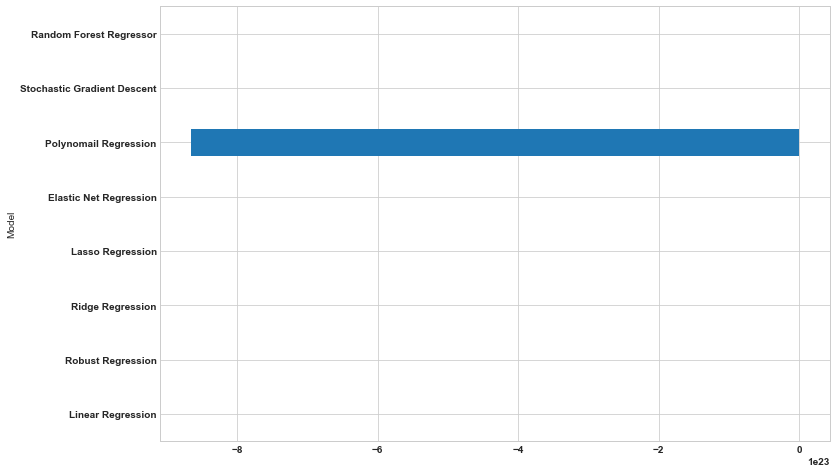

In [11]:
    
#Selecting a Model
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8)) 